#### The Objective
To Build a predictive model to determine building which will have insurance claims during a certain period or not.
Predicting the probability of having at least one claim over the insured period of the building, using the organizational conditions and other set parameters (features) before claims(target) 

Before touching the data, clearly define:
* Is this a **classification** or **regression** problem? Yes, this is a binary classification problem

In [1]:
# importing necessary libraries
import numpy as np  
import  pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

In [2]:
# Loading the dataset
df1 = pd.read_csv(r"C:\Users\Admin\Downloads\Train_data.csv")

In [3]:
# Viewing the first five rows of the dataframe
df1.head()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,Claim
0,H14663,2013,1.0,0,N,V,V,U,290.0,1,1960.0,.,1053,0
1,H2037,2015,1.0,0,V,N,O,R,490.0,1,1850.0,4,1053,0
2,H3802,2014,1.0,0,N,V,V,U,595.0,1,1960.0,.,1053,0
3,H3834,2013,1.0,0,V,V,V,U,2840.0,1,1960.0,.,1053,0
4,H5053,2014,1.0,0,V,N,O,R,680.0,1,1800.0,3,1053,0


In [4]:
# checking number of rows and columns
df1.shape

(7160, 14)

In [5]:
# Checking the structure of the dataframe
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7160 entries, 0 to 7159
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer Id         7160 non-null   object 
 1   YearOfObservation   7160 non-null   int64  
 2   Insured_Period      7160 non-null   float64
 3   Residential         7160 non-null   int64  
 4   Building_Painted    7160 non-null   object 
 5   Building_Fenced     7160 non-null   object 
 6   Garden              7153 non-null   object 
 7   Settlement          7160 non-null   object 
 8   Building Dimension  7054 non-null   float64
 9   Building_Type       7160 non-null   int64  
 10  Date_of_Occupancy   6652 non-null   float64
 11  NumberOfWindows     7160 non-null   object 
 12  Geo_Code            7058 non-null   object 
 13  Claim               7160 non-null   int64  
dtypes: float64(3), int64(4), object(7)
memory usage: 783.3+ KB


In [6]:
# descriptive statistics for numerical columns
df1.describe() 

,YearOfObservation,Insured_Period,Residential,Building Dimension,Building_Type,Date_of_Occupancy,Claim
count,7160.000000,7160.000000,7160.000000,7054.000000,7160.000000,6652.000000,7160.000000
mean,2013.669553,0.909758,0.305447,1883.727530,2.186034,1964.456404,0.228212
std,1.383769,0.239756,0.460629,2278.157745,0.940632,36.002014,0.419709
min,2012.000000,0.000000,0.000000,1.000000,1.000000,1545.000000,0.000000
25%,2012.000000,0.997268,0.000000,528.000000,2.000000,1960.000000,0.000000
50%,2013.000000,1.000000,0.000000,1083.000000,2.000000,1970.000000,0.000000
75%,2015.000000,1.000000,1.000000,2289.750000,3.000000,1980.000000,0.000000
max,2016.000000,1.000000,1.000000,20940.000000,4.000000,2016.000000,1.000000


In [7]:
# Checking for missing values
df1.isnull().sum()

Customer Id             0
YearOfObservation       0
Insured_Period          0
Residential             0
Building_Painted        0
Building_Fenced         0
Garden                  7
Settlement              0
Building Dimension    106
Building_Type           0
Date_of_Occupancy     508
NumberOfWindows         0
Geo_Code              102
Claim                   0
dtype: int64

In [8]:
# Calculating the percentage of missing values in each column
round((df1.isnull().sum()/len(df1)*100),2) 

Customer Id           0.00
YearOfObservation     0.00
Insured_Period        0.00
Residential           0.00
Building_Painted      0.00
Building_Fenced       0.00
Garden                0.10
Settlement            0.00
Building Dimension    1.48
Building_Type         0.00
Date_of_Occupancy     7.09
NumberOfWindows       0.00
Geo_Code              1.42
Claim                 0.00
dtype: float64

In [9]:

# Handling missing values 
df1['Building Dimension'].fillna(df1['Building Dimension'].mean(), inplace=True)
df1['Garden'].fillna(df1['Garden'].mode()[0], inplace=True)
df1['Date_of_Occupancy'].fillna(df1['Date_of_Occupancy'].mode()[0], inplace=True)
df1['Geo_Code'].fillna(df1['Geo_Code'].mode()[0], inplace=True) 

In [10]:
# Checking for duplicates
df1.duplicated().sum()

np.int64(0)

In [11]:
# Checking the shape of the dataframe
df1.shape

(7160, 14)

In [12]:
# Checking to identify categorical and numerical features
cat_col = [col for col in df1.columns if df1[col].dtype == 'object']
num_col = [col for col in df1.columns if df1[col].dtype != 'object']

print("categorical columns:", cat_col)
print("numerical columns:", num_col) 

categorical columns: ['Customer Id', 'Building_Painted', 'Building_Fenced', 'Garden', 'Settlement', 'NumberOfWindows', 'Geo_Code']
numerical columns: ['YearOfObservation', 'Insured_Period', 'Residential', 'Building Dimension', 'Building_Type', 'Date_of_Occupancy', 'Claim']


In [13]:
# Dropping unnecessary columns 
df1.drop(columns=['Customer Id','Geo_Code'],inplace=True) 

In [14]:
# Checking the new shape of the dataframe
df1.shape

(7160, 12)

In [15]:
# Creating a mapping dictionary for categorical variables
mapping = {
    "Building_Painted":{
        "N": 1, # Painted
        "V": 0  # Not Panited 
    },
    'Building_Fenced':{
        "N" : 1,  # Fenced
        "V" : 0,  # Not Fenced 
    },
    "Garden":{
        "V" : 1, # with Garden
        "O" : 0, # without Garden
    },
    "Settlement" :{
        "U" : 1, # Urban
        "R" : 0, # Rural
    }

}


In [16]:
# Applying the mapping to the dataframe
for col in mapping : 
    df1[col] = df1[col].map(mapping[col])



In [17]:
# Checking the mapped columns
print(df1[["Building_Painted","Building_Fenced","Garden","Settlement"]].head()) 

   Building_Painted  Building_Fenced  Garden  Settlement
0                 1                0       1           1
1                 0                1       0           0
2                 1                0       1           1
3                 0                0       1           1
4                 0                1       0           0


In [18]:
# checking to ascertain categorical columns left  
cat_col = [col for col in df1.columns if df1[col].dtype == 'object']
num_col = [col for col in df1.columns if df1[col].dtype != 'object']

print("categorical columns:", cat_col)
print("numerical columns:", num_col) 

categorical columns: ['NumberOfWindows']
numerical columns: ['YearOfObservation', 'Insured_Period', 'Residential', 'Building_Painted', 'Building_Fenced', 'Garden', 'Settlement', 'Building Dimension', 'Building_Type', 'Date_of_Occupancy', 'Claim']


In [19]:
# Converting 'NumberOfWindows' to numeric using pd.to_numeric
df1['NumberofWindows'] = pd.to_numeric(df1['NumberOfWindows'], errors='coerce') 

In [20]:
# viewing the 'NumberOfWindows' column
df1['NumberOfWindows'].head(10) 

0       .
1       4
2       .
3       .
4       3
5       3
6       .
7       .
8       3
9       2
Name: NumberOfWindows, dtype: object

In [21]:
# Calculate the age of the building
df1['Building_Age'] = df1['YearOfObservation'] - df1['Date_of_Occupancy'] 

In [22]:
# Remove negative values from 'Building_Age' and fill missing values with median
df1 = df1[df1['Building_Age'] >= 0]
df1['Building_Age'].fillna(df1['Building_Age'].median(), inplace=True)

In [23]:
# Checking the new 'Building_Age' column
df1[['YearOfObservation', 'Date_of_Occupancy', 'Building_Age']].head()

,YearOfObservation,Date_of_Occupancy,Building_Age
0,2013,1960.0,53.0
1,2015,1850.0,165.0
2,2014,1960.0,54.0
3,2013,1960.0,53.0
4,2014,1800.0,214.0


In [24]:
# dropping the 'YearOfObservation' and 'Date_of_Occupancy' columns
df1.drop(['YearOfObservation', 'Date_of_Occupancy'], axis=1, inplace=True)
# dropping the 'NumberOfWindows' column
df1.drop(['NumberOfWindows'], axis=1, inplace=True) 

In [25]:
#Checking to ascertain columns dropped
df1.shape

(7160, 11)

In [26]:
# Command to check categorical and numerical columns, if there are any categorical columns left 
cat_col = [col for col in df1.columns if df1[col].dtype == 'object']
num_col = [col for col in df1.columns if df1[col].dtype != 'object']

print("categorical columns:", cat_col)
print("numerical columns:", num_col) 

categorical columns: []
numerical columns: ['Insured_Period', 'Residential', 'Building_Painted', 'Building_Fenced', 'Garden', 'Settlement', 'Building Dimension', 'Building_Type', 'Claim', 'NumberofWindows', 'Building_Age']


In [27]:
# Checking to ascertain if there are any categorical columns left
df1.head() 

,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Claim,NumberofWindows,Building_Age
0,1.0,0,1,0,1,1,290.0,1,0,NaN,53.0
1,1.0,0,0,1,0,0,490.0,1,0,4.0,165.0
2,1.0,0,1,0,1,1,595.0,1,0,NaN,54.0
3,1.0,0,0,0,1,1,2840.0,1,0,NaN,53.0
4,1.0,0,0,1,0,0,680.0,1,0,3.0,214.0


In [28]:
# Fill missing values in 'NumberofWindows' with the mean
df1['NumberofWindows'].fillna(df1['NumberofWindows'].mean(), inplace=True) 

In [29]:
# final check of dataframe
df1.head() 

,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Claim,NumberofWindows,Building_Age
0,1.0,0,1,0,1,1,290.0,1,0,4.225296,53.0
1,1.0,0,0,1,0,0,490.0,1,0,4.000000,165.0
2,1.0,0,1,0,1,1,595.0,1,0,4.225296,54.0
3,1.0,0,0,0,1,1,2840.0,1,0,4.225296,53.0
4,1.0,0,0,1,0,0,680.0,1,0,3.000000,214.0


In [30]:
# strategic reordering of columns 
target = 'Claim'   

# Creating  list of all columns except the target
features = [col for col in df1.columns if col != target]

# Reorder dataframe: features first, target last
df2 = df1 [features + [target]] 

In [31]:
df2.head()

,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,NumberofWindows,Building_Age,Claim
0,1.0,0,1,0,1,1,290.0,1,4.225296,53.0,0
1,1.0,0,0,1,0,0,490.0,1,4.000000,165.0,0
2,1.0,0,1,0,1,1,595.0,1,4.225296,54.0,0
3,1.0,0,0,0,1,1,2840.0,1,4.225296,53.0,0
4,1.0,0,0,1,0,0,680.0,1,3.000000,214.0,0


In [32]:
# checking the shape of the final dataframe
df2.shape

(7160, 11)

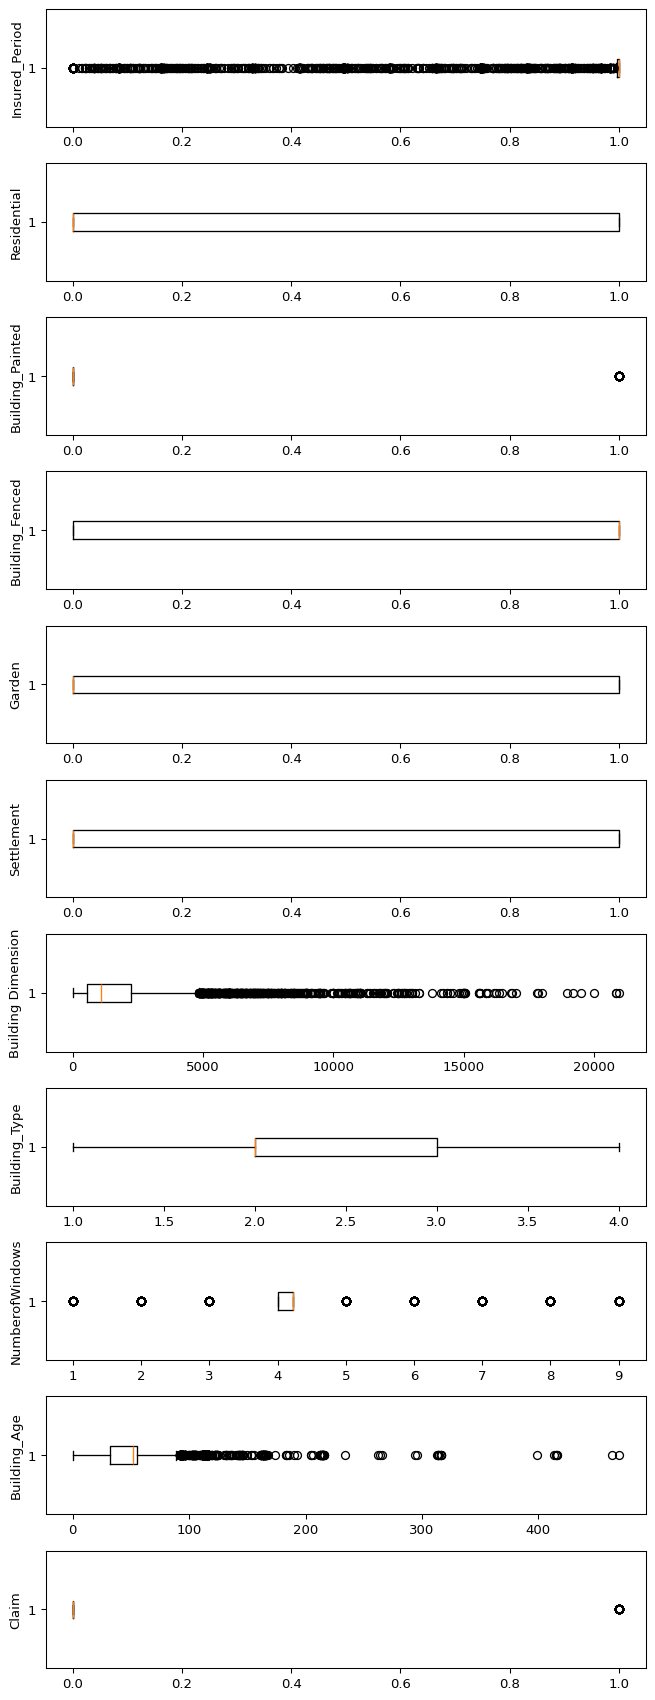

In [33]:
# Univariate analysis 
# Visualizing box plots for each features
fig, axs = plt.subplots(len(df2.columns), 1, figsize=(7, 18), dpi=95)
for i, col in enumerate(df2.columns):
    axs[i].boxplot(df2[col], vert=False)
    axs[i].set_ylabel(col)
plt.tight_layout()
plt.show()

In [34]:
# Handling outliers using IQR method

# handling ouliers for 'Building_Age' column 
q1, q3 = np.percentile(df2['Building_Age'], [25,75])
iqr = q3 - q1 
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
df2 = df2[(df2['Building_Age']>= lower_bound) & (df2['Building_Age']<= upper_bound)] 

# handling ouliers for 'NumberofWindows' column 
q1, q3 = np.percentile(df2['NumberofWindows'], [25, 75])
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
df2 = df2[(df2['NumberofWindows']>= lower_bound) & (df2['NumberofWindows']<= upper_bound)] 

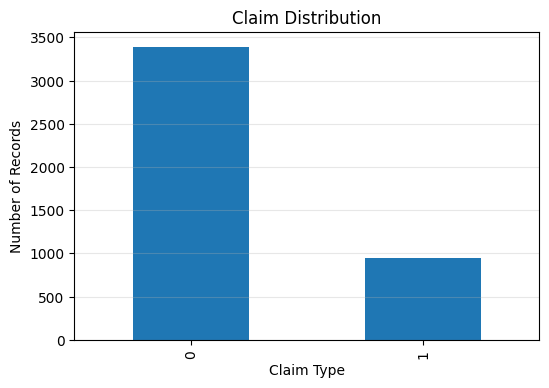

In [35]:
# Univariate analysis after handling outliers
# Visualizing the distribution of the target variable 'Claim'.
claim_counts = df2['Claim'].value_counts() 

plt.figure(figsize=(6,4))
claim_counts.plot(kind='bar')

plt.title('Claim Distribution')
plt.xlabel('Claim Type')
plt.ylabel('Number of Records')

plt.grid(axis='y', alpha=0.3)
plt.show()


In [36]:
# Bivariate analysis 
# using correlation matrix to see relationships between features 
df2.corr() 

,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,NumberofWindows,Building_Age,Claim
Insured_Period,1.000000,-0.040414,0.069384,0.046641,-0.046846,-0.045431,0.004961,-0.019859,-0.043966,-0.054299,0.075100
Residential,-0.040414,1.000000,0.104601,0.040066,-0.039682,-0.040621,0.021805,0.340885,-0.033479,0.085120,0.039312
Building_Painted,0.069384,0.104601,1.000000,-0.396321,0.396623,0.396924,-0.090288,0.109091,0.376297,0.061963,-0.024841
Building_Fenced,0.046641,0.040066,-0.396321,1.000000,-0.999241,-0.998482,0.164777,-0.054300,-0.949473,-0.126052,0.064358
Garden,-0.046846,-0.039682,0.396623,-0.999241,1.000000,0.999241,-0.164629,0.054366,0.948752,0.126174,-0.065443
Settlement,-0.045431,-0.040621,0.396924,-0.998482,0.999241,1.000000,-0.164586,0.054432,0.948032,0.125705,-0.065099
Building Dimension,0.004961,0.021805,-0.090288,0.164777,-0.164629,-0.164586,1.000000,-0.035097,-0.072933,-0.240619,0.280080
Building_Type,-0.019859,0.340885,0.109091,-0.054300,0.054366,0.054432,-0.035097,1.000000,0.057149,0.204975,0.077089
NumberofWindows,-0.043966,-0.033479,0.376297,-0.949473,0.948752,0.948032,-0.072933,0.057149,1.000000,0.134649,-0.037648
Building_Age,-0.054299,0.085120,0.061963,-0.126052,0.126174,0.125705,-0.240619,0.204975,0.134649,1.000000,-0.038412


In [37]:
# correlation of features with target variable 'Claim'
corr = df2.corr() 
print(corr['Claim'].sort_values(ascending=False)) 

Claim                 1.000000
Building Dimension    0.280080
Building_Type         0.077089
Insured_Period        0.075100
Building_Fenced       0.064358
Residential           0.039312
Building_Painted     -0.024841
NumberofWindows      -0.037648
Building_Age         -0.038412
Settlement           -0.065099
Garden               -0.065443
Name: Claim, dtype: float64


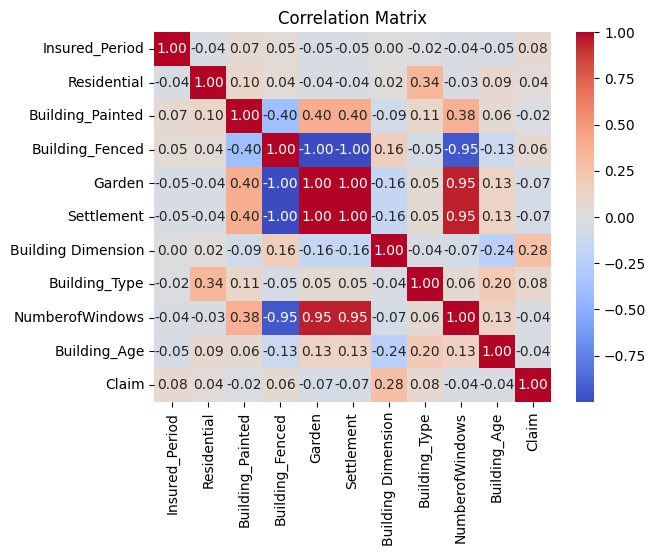

In [38]:
# Multivariate analysis, showing correlations among all features
#  Detect multicollinearity, Identify strong predictors
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm') 
plt.title('Correlation Matrix')
plt.show() 

In [39]:
# Splitting  features and target from dataframe 
X = df2.drop(columns=['Claim'], axis=1) 
y = df2['Claim'] 

In [40]:
# Splitting data into trainimg and testing sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
scaler = StandardScaler() 
X_train = scaler.fit_transform(X_train) 
X_test = scaler.transform(X_test) 

In [42]:
# Importing necessary libraries for model building and evaluation
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import GridSearchCV, cross_val_score
from xgboost import XGBClassifier

In [43]:
# Training Random Forest Classifier 
# This model is used for classification tasks due to its strong performance and ability to handle large datasets with higher dimensionality.
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train) 

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric

In [44]:
# Evaluating the model
y_pred = rf.predict(X_test)
y_prob = rf.predict_proba(X_test)

In [45]:
y_test

4829    0
2645    0
1501    0
1032    1
6646    1
       ..
577     1
1350    0
3961    0
5196    0
4549    0
Name: Claim, Length: 870, dtype: int64

In [46]:
y_train

3648    1
1264    0
5613    0
4923    0
3374    0
       ..
5668    0
825     0
4975    0
6165    0
1424    1
Name: Claim, Length: 3476, dtype: int64

In [47]:
# Model Performance Metrics 
accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred))
confusion_matrix(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.79      0.89      0.84       664
           1       0.41      0.25      0.31       206

    accuracy                           0.74       870
   macro avg       0.60      0.57      0.57       870
weighted avg       0.70      0.74      0.71       870



array([[592,  72],
       [155,  51]])

#### Metrics Interpretation
* **Accuracy** – Overall correctness
* **Precision** – False positives control
* **Recall** – False negatives control
* **F1-Score** – Balance of precision & recall

In [48]:
# Calculating ROC-AUC Score, The results show the model's ability to distinguish between classes. A score of 0.62 shows the model performed better than random guessing.
roc_auc_score(y_test, y_prob[:,1])

0.6149293777049948

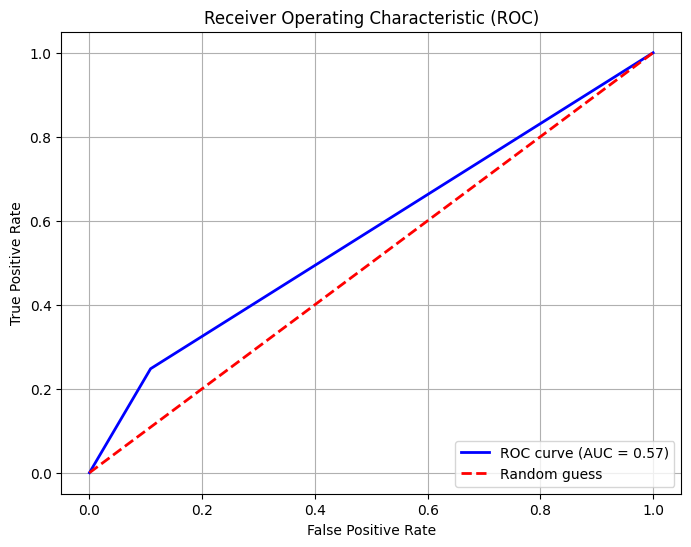

In [49]:
# 5. Compute ROC curve and AUC
from sklearn.metrics import auc 


fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc_score = auc(fpr, tpr)

# 6. Plot ROC curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

In [50]:
# Hyperparameter Tuning using GridSearchCV, this technique systematically works through multiple combinations of parameter tunes, cross-validating as it goes to determine which tune gives the best performance.
params = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20]
}

grid = GridSearchCV(rf, params, cv=5,scoring='accuracy',n_jobs=-1,verbose=2)
grid.fit(X_train, y_train)
print("Best accuracy:", grid.best_score_)
print("grid.best_params_:", grid.best_params_) 

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best accuracy: 0.7891234598528074
grid.best_params_: {'max_depth': 10, 'n_estimators': 200}


In [51]:
neg, pos = np.bincount(y_train) 
print(f"Negative: {neg}, Positive: {pos}") 

scale_pos_weight = neg / pos
print(f"scale_pos_weight: {scale_pos_weight}") 

Negative: 2730, Positive: 746
scale_pos_weight: 3.6595174262734584


In [52]:
# using industry standard model XGBoost Classifier for better performance
# Finding the baseline performance of XGBoost Classifier
from xgboost import XGBClassifier 
xgb = XGBClassifier(
    n_estimators=300,
    max_depth=10,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric='auc',
    scale_pos_weight=scale_pos_weight,
    random_state=42
)

xgb.fit(X_train, y_train)  

,"objective objective: str | xgboost.sklearn._SklObjWProto | typing.Callable[[typing.Any, typing.Any], typing.Tuple[numpy.ndarray, numpy.ndarray]] | NoneSpecify the learning task and the corresponding learning objective or a customobjective function to be used.For custom objective, see :doc:`/tutorials/custom_metric_obj` and:ref:`custom-obj-metric` for more information, along with the end note forfunction signatures.",'binary:logistic'
,"base_score base_score: float | typing.List[float] | NoneThe initial prediction score of all instances, global bias.",None
,booster,None
,"callbacks callbacks: typing.List[xgboost.callback.TrainingCallback] | NoneList of callback functions that are applied at end of each iteration.It is possible to use predefined callbacks by using:ref:`Callback API `... note:: States in callback are not preserved during training, which means callback objects can not be reused for multiple training sessions without reinitialization or deepcopy... code-block:: python for params in parameters_grid: # be sure to (re)initialize the callbacks before each run callbacks = [xgb.callback.LearningRateScheduler(custom_rates)] reg = xgboost.XGBRegressor(**params, callbacks=callbacks) reg.fit(X, y)",None
,colsample_bylevel colsample_bylevel: float | NoneSubsample ratio of columns for each level.,None
,colsample_bynode colsample_bynode: float | NoneSubsample ratio of columns for each split.,None
,colsample_bytree colsample_bytree: float | NoneSubsample ratio of columns when constructing each tree.,0.8
,"device device: str | None.. versionadded:: 2.0.0Device ordinal, available options are `cpu`, `cuda`, and `gpu`.",None
,"early_stopping_rounds early_stopping_rounds: int | None.. versionadded:: 1.6.0- Activates early stopping. Validation metric needs to improve at least once in every **early_stopping_rounds** round(s) to continue training. Requires at least one item in **eval_set** in :py:meth:`fit`.- If early stopping occurs, the model will have two additional attributes: :py:attr:`best_score` and :py:attr:`best_iteration`. These are used by the :py:meth:`predict` and :py:meth:`apply` methods to determine the optimal number of trees during inference. If users want to access the full model (including trees built after early stopping), they can specify the `iteration_range` in these inference methods. In addition, other utilities like model plotting can also use the entire model.- If you prefer to discard the trees after `best_iteration`, consider using the callback function :py:class:`xgboost.callback.EarlyStopping`.- If there's more than one item in **eval_set**, the last entry will be used for early stopping. If there's more than one metric in **eval_metric**, the last metric will be used for early stopping.",None
,enable_categorical enable_categorical: boolSee the same parameter of :py:class:`DMatrix` for details.,False
,"eval_metric eval_metric: str | typing.List[str | typing.Callable] | typing.Callable | None.. versionadded:: 1.6.0Metric used for monitoring the training result and early stopping. It can be astring or list of strings as names of predefined metric in XGBoost (See:doc:`/parameter`), one of the metrics in :py:mod:`sklearn.metrics`, or anyother user defined metric that looks like `sklearn.metrics`.If custom objective is also provided, then custom metric should implement thecorresponding reverse link function.Unlike the `scoring` parameter commonly used in scikit-learn, when a callableobject is provided, it's assumed to be a cost function and by default XGBoostwill minimize the result during early stopping.For advanced usage on Early stopping like directly choosing to maximize insteadof minimize, see :py:obj:`xgboost.callback.EarlyStopping`.See :doc:`/tutorials/custom_metric_obj` and :ref:`custom-obj-metric` for moreinformation... code-block:: python from sklearn.datasets import load_diabetes from sklearn.metrics import mean_absolute_error X, y = load_diabetes(return_X_y=True) reg = xgb.XGBRegressor( tree_metho

In [53]:
y_pred = xgb.predict(X_test)
y_proba = xgb.predict_proba(X_test)[:, 1] 
from sklearn.metrics import roc_auc_score as roc_auc_score_func

print("auc:", roc_auc_score_func(y_test, y_proba))
print(classification_report(y_test, y_pred)) 

auc: 0.6313750146215932
              precision    recall  f1-score   support

           0       0.80      0.79      0.80       664
           1       0.35      0.37      0.36       206

    accuracy                           0.69       870
   macro avg       0.58      0.58      0.58       870
weighted avg       0.70      0.69      0.69       870



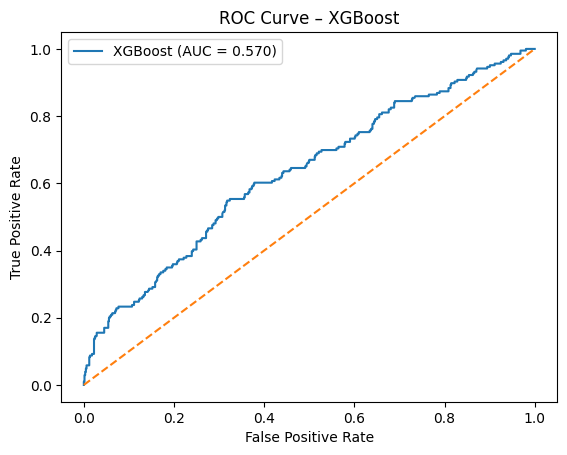

In [54]:
fpr, tpr, _ = roc_curve(y_test, y_proba)

plt.figure()
plt.plot(fpr, tpr, label=f"XGBoost (AUC = {roc_auc_score:.3f})")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve – XGBoost")
plt.legend()
plt.show()


In [55]:
from sklearn.model_selection import RandomizedSearchCV
# Hyperparameter tuning for XGBoost Classifier using RandomizedSearchCV
xgb = XGBClassifier(
    objective='binary:logistic',
    eval_metric='auc',
    scale_pos_weight=scale_pos_weight,
    random_state=42,
    n_jobs=-1
)

# Define the parameter grid for RandomizedSearchCV
param_dist = {
    'n_estimators': np.arange(200, 600, 100),
    'max_depth': np.arange(3, 9),
    'learning_rate': np.arange(0.01, 0.2, 10),
    'subsample': np.linspace(0.6, 1.0, 5),
    'colsample_bytree': np.linspace(0.6, 1.0, 5)
}
# Perform Randomized Search CV
random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=10,
    cv=5,
    verbose=1,
    scoring='roc_auc',
    n_jobs=-1,
    random_state=42
)

# Fit the model
random_search.fit(X_train, y_train)
best_xgb = random_search.best_estimator_
y_proba = best_xgb.predict_proba(X_test)[:, 1]
print("Best AUC after Hyperparameter Tuning:", roc_auc_score_func(y_test, y_proba))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best AUC after Hyperparameter Tuning: 0.6911882968768276


In [56]:
# Re-instantiate XGBClassifier with best params to use early_stopping_rounds
from xgboost import XGBClassifier

xgb_final = XGBClassifier(
    **best_xgb.get_params()
)

xgb_final.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)],
    verbose=False
)

,"objective objective: str | xgboost.sklearn._SklObjWProto | typing.Callable[[typing.Any, typing.Any], typing.Tuple[numpy.ndarray, numpy.ndarray]] | NoneSpecify the learning task and the corresponding learning objective or a customobjective function to be used.For custom objective, see :doc:`/tutorials/custom_metric_obj` and:ref:`custom-obj-metric` for more information, along with the end note forfunction signatures.",'binary:logistic'
,"base_score base_score: float | typing.List[float] | NoneThe initial prediction score of all instances, global bias.",None
,booster,None
,"callbacks callbacks: typing.List[xgboost.callback.TrainingCallback] | NoneList of callback functions that are applied at end of each iteration.It is possible to use predefined callbacks by using:ref:`Callback API `... note:: States in callback are not preserved during training, which means callback objects can not be reused for multiple training sessions without reinitialization or deepcopy... code-block:: python for params in parameters_grid: # be sure to (re)initialize the callbacks before each run callbacks = [xgb.callback.LearningRateScheduler(custom_rates)] reg = xgboost.XGBRegressor(**params, callbacks=callbacks) reg.fit(X, y)",None
,colsample_bylevel colsample_bylevel: float | NoneSubsample ratio of columns for each level.,None
,colsample_bynode colsample_bynode: float | NoneSubsample ratio of columns for each split.,None
,colsample_bytree colsample_bytree: float | NoneSubsample ratio of columns when constructing each tree.,np.float64(0.6)
,"device device: str | None.. versionadded:: 2.0.0Device ordinal, available options are `cpu`, `cuda`, and `gpu`.",None
,"early_stopping_rounds early_stopping_rounds: int | None.. versionadded:: 1.6.0- Activates early stopping. Validation metric needs to improve at least once in every **early_stopping_rounds** round(s) to continue training. Requires at least one item in **eval_set** in :py:meth:`fit`.- If early stopping occurs, the model will have two additional attributes: :py:attr:`best_score` and :py:attr:`best_iteration`. These are used by the :py:meth:`predict` and :py:meth:`apply` methods to determine the optimal number of trees during inference. If users want to access the full model (including trees built after early stopping), they can specify the `iteration_range` in these inference methods. In addition, other utilities like model plotting can also use the entire model.- If you prefer to discard the trees after `best_iteration`, consider using the callback function :py:class:`xgboost.callback.EarlyStopping`.- If there's more than one item in **eval_set**, the last entry will be used for early stopping. If there's more than one metric in **eval_metric**, the last metric will be used for early stopping.",None
,enable_categorical enable_categorical: boolSee the same parameter of :py:class:`DMatrix` for details.,False
,"eval_metric eval_metric: str | typing.List[str | typing.Callable] | typing.Callable | None.. versionadded:: 1.6.0Metric used for monitoring the training result and early stopping. It can be astring or list of strings as names of predefined metric in XGBoost (See:doc:`/parameter`), one of the metrics in :py:mod:`sklearn.metrics`, or anyother user defined metric that looks like `sklearn.metrics`.If custom objective is also provided, then custom metric should implement thecorresponding reverse link function.Unlike the `scoring` parameter commonly used in scikit-learn, when a callableobject is provided, it's assumed to be a cost function and by default XGBoostwill minimize the result during early stopping.For advanced usage on Early stopping like directly choosing to maximize insteadof minimize, see :py:obj:`xgboost.callback.EarlyStopping`.See :doc:`/tutorials/custom_metric_obj` and :ref:`custom-obj-metric` for moreinformation... code-block:: python from sklearn.datasets import load_diabetes from sklearn.metrics import mean_absolute_error X, y = load_diabetes(return_X_y=True) reg = xgb.XGBRegressor

#### Comparing XGBClassifier model with RandomForestClassifier

In [57]:
rf2 = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    class_weight='balanced',  # important for imbalanced datasets
    random_state=42,
    n_jobs=-1
    ) 

rf2.fit(X_train, y_train) 
    


,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",300
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric

In [58]:
xgb2 = XGBClassifier(
    n_estimators=500,
    max_depth=6,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric='auc',
    scale_pos_weight=(y_train.value_counts()[0] / y_train.value_counts()[1]),
    random_state=42,
    n_jobs=-1
)

xgb2.fit(X_train, y_train) 

,"objective objective: str | xgboost.sklearn._SklObjWProto | typing.Callable[[typing.Any, typing.Any], typing.Tuple[numpy.ndarray, numpy.ndarray]] | NoneSpecify the learning task and the corresponding learning objective or a customobjective function to be used.For custom objective, see :doc:`/tutorials/custom_metric_obj` and:ref:`custom-obj-metric` for more information, along with the end note forfunction signatures.",'binary:logistic'
,"base_score base_score: float | typing.List[float] | NoneThe initial prediction score of all instances, global bias.",None
,booster,None
,"callbacks callbacks: typing.List[xgboost.callback.TrainingCallback] | NoneList of callback functions that are applied at end of each iteration.It is possible to use predefined callbacks by using:ref:`Callback API `... note:: States in callback are not preserved during training, which means callback objects can not be reused for multiple training sessions without reinitialization or deepcopy... code-block:: python for params in parameters_grid: # be sure to (re)initialize the callbacks before each run callbacks = [xgb.callback.LearningRateScheduler(custom_rates)] reg = xgboost.XGBRegressor(**params, callbacks=callbacks) reg.fit(X, y)",None
,colsample_bylevel colsample_bylevel: float | NoneSubsample ratio of columns for each level.,None
,colsample_bynode colsample_bynode: float | NoneSubsample ratio of columns for each split.,None
,colsample_bytree colsample_bytree: float | NoneSubsample ratio of columns when constructing each tree.,0.8
,"device device: str | None.. versionadded:: 2.0.0Device ordinal, available options are `cpu`, `cuda`, and `gpu`.",None
,"early_stopping_rounds early_stopping_rounds: int | None.. versionadded:: 1.6.0- Activates early stopping. Validation metric needs to improve at least once in every **early_stopping_rounds** round(s) to continue training. Requires at least one item in **eval_set** in :py:meth:`fit`.- If early stopping occurs, the model will have two additional attributes: :py:attr:`best_score` and :py:attr:`best_iteration`. These are used by the :py:meth:`predict` and :py:meth:`apply` methods to determine the optimal number of trees during inference. If users want to access the full model (including trees built after early stopping), they can specify the `iteration_range` in these inference methods. In addition, other utilities like model plotting can also use the entire model.- If you prefer to discard the trees after `best_iteration`, consider using the callback function :py:class:`xgboost.callback.EarlyStopping`.- If there's more than one item in **eval_set**, the last entry will be used for early stopping. If there's more than one metric in **eval_metric**, the last metric will be used for early stopping.",None
,enable_categorical enable_categorical: boolSee the same parameter of :py:class:`DMatrix` for details.,False
,"eval_metric eval_metric: str | typing.List[str | typing.Callable] | typing.Callable | None.. versionadded:: 1.6.0Metric used for monitoring the training result and early stopping. It can be astring or list of strings as names of predefined metric in XGBoost (See:doc:`/parameter`), one of the metrics in :py:mod:`sklearn.metrics`, or anyother user defined metric that looks like `sklearn.metrics`.If custom objective is also provided, then custom metric should implement thecorresponding reverse link function.Unlike the `scoring` parameter commonly used in scikit-learn, when a callableobject is provided, it's assumed to be a cost function and by default XGBoostwill minimize the result during early stopping.For advanced usage on Early stopping like directly choosing to maximize insteadof minimize, see :py:obj:`xgboost.callback.EarlyStopping`.See :doc:`/tutorials/custom_metric_obj` and :ref:`custom-obj-metric` for moreinformation... code-block:: python from sklearn.datasets import load_diabetes from sklearn.metrics import mean_absolute_error X, y = load_diabetes(return_X_y=True) reg = xgb.XGBRegressor( tree_metho

In [59]:
# Compare performance on test set, predictions and probabilities
rf_pred = rf2.predict(X_test)
rf_proba = rf2.predict_proba(X_test)[:, 1]

xgb_pred = xgb2.predict(X_test)
xgb_proba = xgb2.predict_proba(X_test)[:, 1]

In [60]:
# Compare classification reports
# focusing on recall and F1-score due to class imbalance
print("Random Forest Classification Report:")
print(classification_report(y_test, rf_pred)) 

print("XGBoost Classification Report:")
print(classification_report(y_test, xgb_pred)) 

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.89      0.83       664
           1       0.38      0.22      0.28       206

    accuracy                           0.73       870
   macro avg       0.58      0.56      0.56       870
weighted avg       0.69      0.73      0.70       870

XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.75      0.78       664
           1       0.36      0.44      0.39       206

    accuracy                           0.68       870
   macro avg       0.58      0.60      0.59       870
weighted avg       0.70      0.68      0.69       870



In [61]:
# Compare AUC scores
# Using roc_auc_score_func for consistency
# Higher AUC indicates better ranking of positive classs, difference >= 0.02 is significant
rf_auc = roc_auc_score_func(y_test, rf_proba)
xgb_auc = roc_auc_score_func(y_test, xgb_proba) 

print(f"Random Forest AUC: {rf_auc:.4f}")
print(f"XGBoost AUC: {xgb_auc:.4f}")

Random Forest AUC: 0.6187
XGBoost AUC: 0.6462


In [62]:
# Cross- validation comparison, this tells of generalisation not just test performance
# Interpretation: Higher mean AUC and lower stddev indicates better and more stable model
from sklearn.model_selection import StratifiedKFold, cross_val_score

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
rf_cv_auc = cross_val_score(
rf2,X_train, y_train,
 cv=cv, scoring='roc_auc', n_jobs=-1
)

xgb_cv_auc = cross_val_score(
xgb2, X_train, y_train,
 cv=cv, scoring='roc_auc', n_jobs=-1
)

print(f"Random Forest CV AUC: Mean={rf_cv_auc.mean():.4f}, std={rf_cv_auc.std():.4f}")
print(f"XGBoost CV AUC: Mean={xgb_cv_auc.mean():.4f}, std={xgb_cv_auc.std():.4f}")

Random Forest CV AUC: Mean=0.6322, std=0.0178
XGBoost CV AUC: Mean=0.6432, std=0.0097


In [63]:
# Use only feature columns (exclude 'Claim')
# Final model selection based on previous comparisons & predictions on new data
new_data_features = df2.drop(columns=['Claim'])
new_data_scaled = scaler.transform(new_data_features)
final_predictions = xgb2.predict(new_data_scaled)

In [64]:
# Feature Importance from the final XGBoost model
pd.Series(xgb2.feature_importances_, index=new_data_features.columns).sort_values(ascending=False)

Building Dimension    0.139307
Garden                0.117371
Settlement            0.108657
Insured_Period        0.098273
Building_Age          0.098002
Building_Type         0.097326
Building_Painted      0.095925
Building_Fenced       0.085569
Residential           0.080959
NumberofWindows       0.078612
dtype: float32

In [65]:
import joblib

# Save the final model
joblib.dump(xgb2, 'final_model.pkl')
joblib.dump(scaler,"scaler.pkl") 

['scaler.pkl']